In [7]:
from Blackjack import Game
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [8]:
# modify these variables to change the the game
GAMES = 5000
SHOE_SIZE = 2
SHOE_PENETRATION = 0.25
BET_SPREAD = 50
DECK_SIZE = 52

In [9]:
money = []
bets = []
countings = []
nb_hands = 0

for g in range(GAMES):
    game = Game(GAMES, SHOE_SIZE, SHOE_PENETRATION, BET_SPREAD, DECK_SIZE)
    while not game.shoe.reshuffle:
        game.play_round()
        nb_hands += 1

    money.append(game.get_money())
    bets.append(game.get_bet())
    countings += game.shoe.count_history

    # uncomment this line to see a game by game bet
    # print("Game %d: %s (%s bet)" % (g + 1, "{0:.2f}".format(game.get_money()), "{0:.2f}".format(game.get_bet())))

money_won = sum(money)
bet_volume = sum(bets)
# print("-" * 30)
print("Money Won: ${:,.2f}".format(money_won))
print("Bet Volume: ${:,.2f}".format(bet_volume))
print("Overall winnings: ${} (EDGE = {} %)".format("{0:.2f}".format(money_won), "{0:.3f}".format(100.0 * money_won/bet_volume)))

Money Won: $19,026.50
Bet Volume: $651,092.00
Overall winnings: $19026.50 (EDGE = 2.922 %)


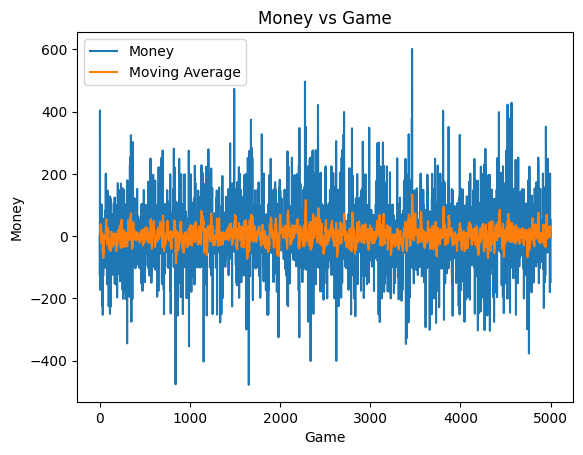

In [10]:
money_series = pd.Series(money)

# Calculate the moving average with a window size of 10
moving_average = money_series.rolling(window=10).mean()

# Plot the original data and the moving average
plt.plot(money_series, label='Money')
plt.plot(moving_average, label='Moving Average') #
plt.xlabel('Game')
plt.ylabel('Money')
plt.title('Money vs Game')
plt.legend()
plt.show()

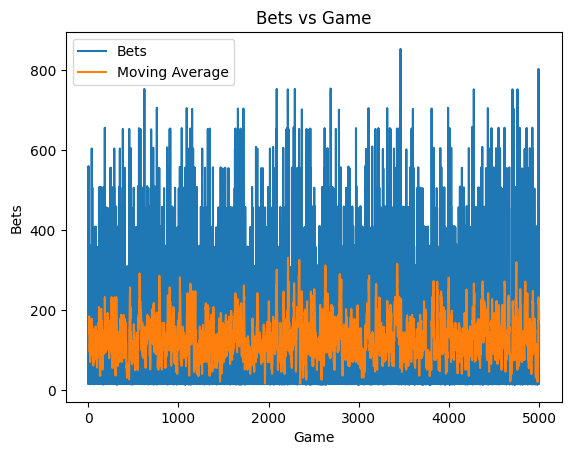

In [11]:
# Convert the 'money' list to a pandas Series
money_series = pd.Series(bets)

# Calculate the moving average with a window size of 10
moving_average = money_series.rolling(window=10).mean()

# Plot the original data and the moving average
plt.plot(money_series, label='Bets')
plt.plot(moving_average, label='Moving Average') #
plt.xlabel('Game')
plt.ylabel('Bets')
plt.title('Bets vs Game')
plt.legend()
plt.show()

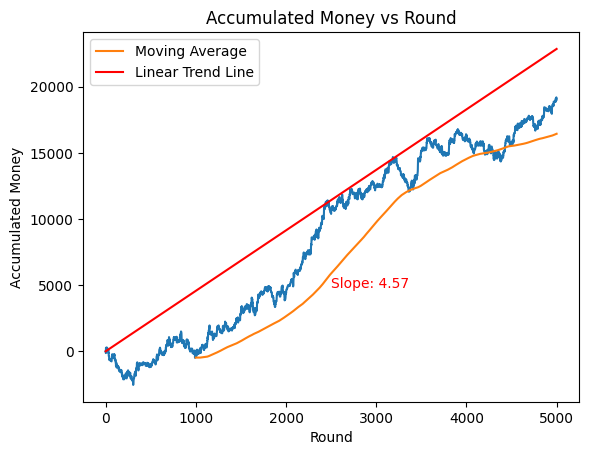

In [12]:
accumulated_money = []
last_sum = 0

for i in range(len(money)):
    last_sum += money[i]
    accumulated_money.append(last_sum)

slope, _ = np.polyfit(range(len(accumulated_money)), accumulated_money, 1)

plt.plot(accumulated_money)
plt.xlabel('Round')
plt.ylabel('Accumulated Money')
plt.title('Accumulated Money vs Round')

moving_average = pd.Series(accumulated_money).rolling(window=1000).mean()

plt.plot(moving_average, label='Moving Average')

# Calculate the x and y values for the linear trend line
x = range(len(accumulated_money))
y = slope * np.array(x) + accumulated_money[0]

# Plot the linear trend line in red
plt.plot(x, y, color='red', label='Linear Trend Line')

# Label the slope of the trend line
plt.text(len(accumulated_money) / 2, max(accumulated_money) / 4, f'Slope: {slope:.2f}', color='red')

plt.legend()
plt.show()